#IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import time
import warnings
warnings.filterwarnings('ignore')

#IMPORTING DATASET

In [2]:
dt = pd.read_csv("bank-full.csv", delimiter=';')
dt

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#EXPLORATORY DATA ANALYSIS

In [3]:
dt.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [4]:
print("Sample data: \n")
dt.sample(5)

Sample data: 



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13869,34,admin.,divorced,secondary,no,0,no,no,cellular,10,jul,268,1,-1,0,unknown,no
38143,35,blue-collar,married,secondary,no,253,yes,no,cellular,15,may,452,1,345,1,other,no
19248,51,services,married,secondary,no,122,no,yes,cellular,6,aug,499,2,-1,0,unknown,no
13094,29,housemaid,married,primary,no,7,no,yes,cellular,8,jul,240,1,-1,0,unknown,no
3237,42,blue-collar,married,secondary,no,9359,yes,no,unknown,15,may,197,1,-1,0,unknown,no


In [5]:
dt.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Converting some of the object type data into numerical data as the columns contain numbers

In [6]:
pd.isnull(dt).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Missing values in contact, poutcome, pdays as given in variables table

In [7]:
dt['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

13020 unknown values

In [8]:
print(dt['poutcome'].value_counts())
print()
print(dt['pdays'].value_counts())
print()
print(dt['y'].value_counts())

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

no     39922
yes     5289
Name: y, dtype: int64


Label-encoding for y

In [9]:
def discrete(i):
    if i['y'] == 'no':
        return 0
    if i['y'] == "yes":
        return 1
dt['y']=dt.apply(discrete,axis=1)

In [10]:
#print(dt[dt['contact'] == 'cellular']['y'].value_counts())
#0    24916
#1     4369
#print("Percentage of term deposit taken where contact is cellular out of all cellular contacts:", dt["y"][dt["contact"] == 'cellular'].value_counts(normalize = True)[1]*100)
#4369/(4369+24916)

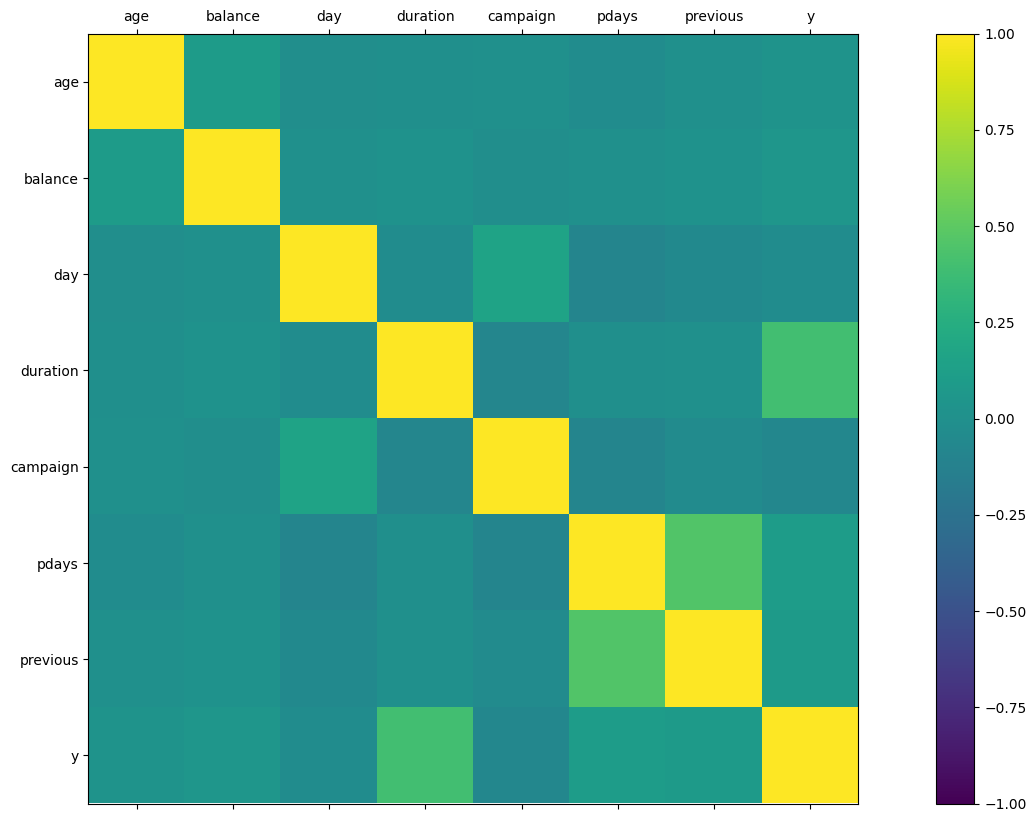

In [11]:
names = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

correlations = dt.corr()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [12]:
print(dt['marital'].value_counts())

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


Label-encoding for contact

In [13]:
def cl_contact(i):
    if i['contact'] == 'telephone':
        return 0
    if i['contact'] == "cellular":
        return 1
dt['contact']=dt.apply(cl_contact,axis=1)

Label-encoding for marital status

In [14]:
def cl_marital(i):
    if i['marital'] == 'divorced':
        return 0
    if i['marital'] == "single":
        return 1
    if i['marital'] == 'married':
        return 2
dt['marital']=dt.apply(cl_marital,axis=1)

Label-encoding for poutcome

In [15]:
def cl_pout(i):
    if i['poutcome'] == 'failure':
        return 0
    if i['poutcome'] == "success":
        return 1
    if i['poutcome'] == 'other':
        return 2
dt['poutcome']=dt.apply(cl_pout,axis=1)

Label-encoding for default

In [16]:
def cl_default(i):
    if i['default'] == 'no':
        return 0
    if i['default'] == "yes":
        return 1
dt['default']=dt.apply(cl_default,axis=1)

Label-encoding for housing

In [17]:
def cl_housing(i):
    if i['housing'] == 'no':
        return 0
    if i['housing'] == "yes":
        return 1
dt['housing']=dt.apply(cl_housing,axis=1)

Label-encoding for loan

In [18]:
def cl_loan(i):
    if i['loan'] == 'no':
        return 0
    if i['loan'] == "yes":
        return 1
dt['loan']=dt.apply(cl_loan,axis=1)

In [19]:
dt.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
22981,35,technician,1,tertiary,0,7838,0,0,1.0,26,aug,17,23,-1,0,NaN,0
25250,38,technician,2,secondary,0,508,1,0,1.0,18,nov,722,3,175,2,0.0,0
39704,56,admin.,1,secondary,0,4118,0,0,0.0,27,may,165,1,-1,0,NaN,1
14625,37,admin.,2,secondary,0,0,1,0,0.0,15,jul,280,6,-1,0,NaN,0
652,44,self-employed,0,tertiary,0,4,1,0,NaN,6,may,312,3,-1,0,NaN,0
12765,43,technician,2,secondary,0,-796,0,0,1.0,7,jul,190,4,-1,0,NaN,0
29627,27,unemployed,1,secondary,0,0,0,1,1.0,3,feb,392,2,-1,0,NaN,0
29350,47,entrepreneur,0,secondary,0,186,0,0,1.0,2,feb,112,2,-1,0,NaN,0
22027,40,management,2,tertiary,0,526,1,0,1.0,20,aug,113,4,-1,0,NaN,0
21933,32,technician,2,tertiary,0,587,0,0,1.0,20,aug,212,4,-1,0,NaN,0


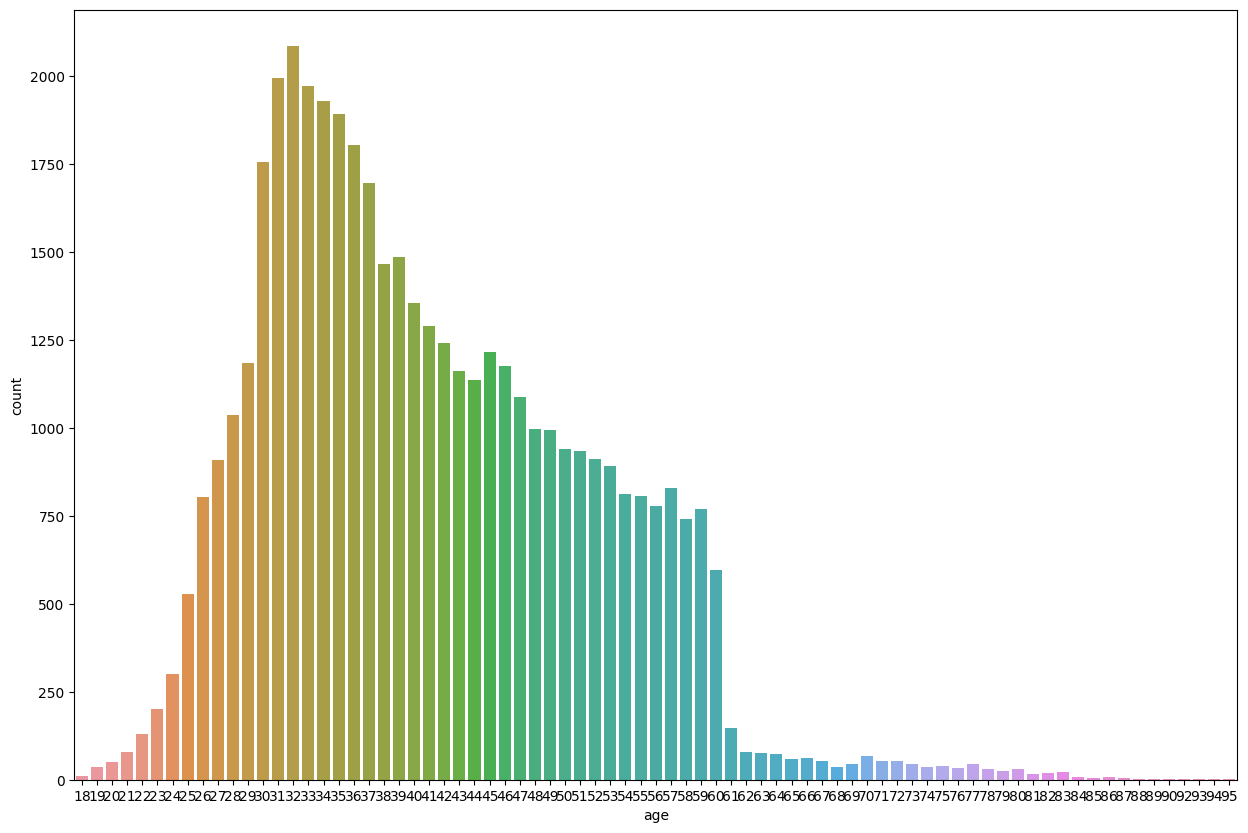

In [20]:
plt.subplots(figsize=(15,10))
sbn.countplot(x='age', data=dt)
plt.show()

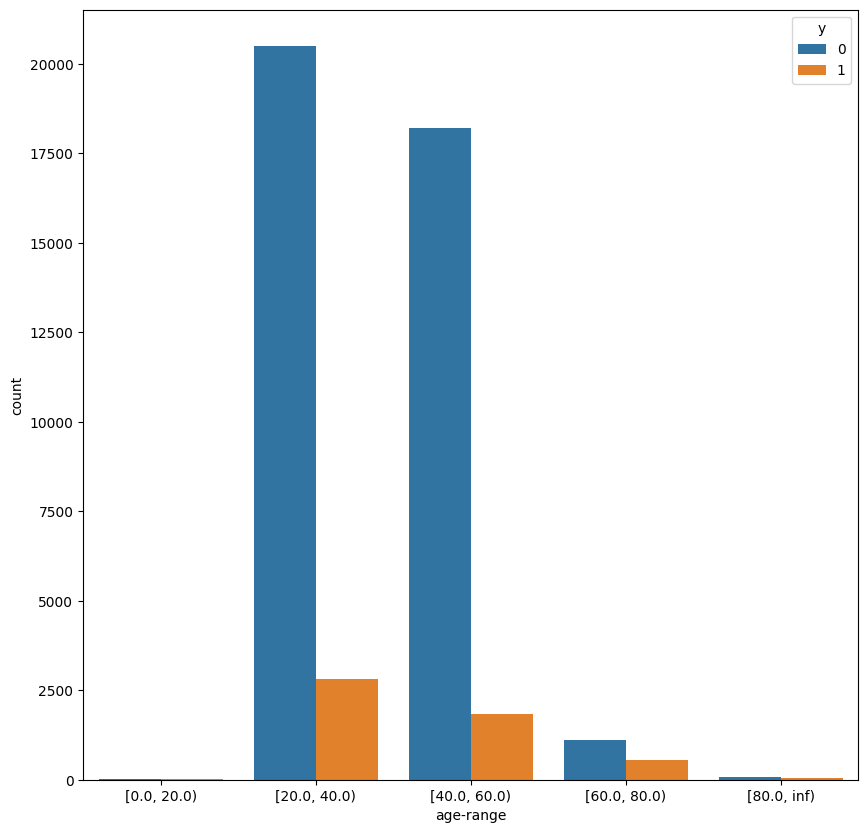

In [21]:
dt['age-range'] = pd.cut(dt['age'], [0,20,40,60,80, np.inf], right=False)

plt.subplots(figsize=(10,10))
sbn.countplot(x='age-range', hue='y', data=dt)
plt.show()

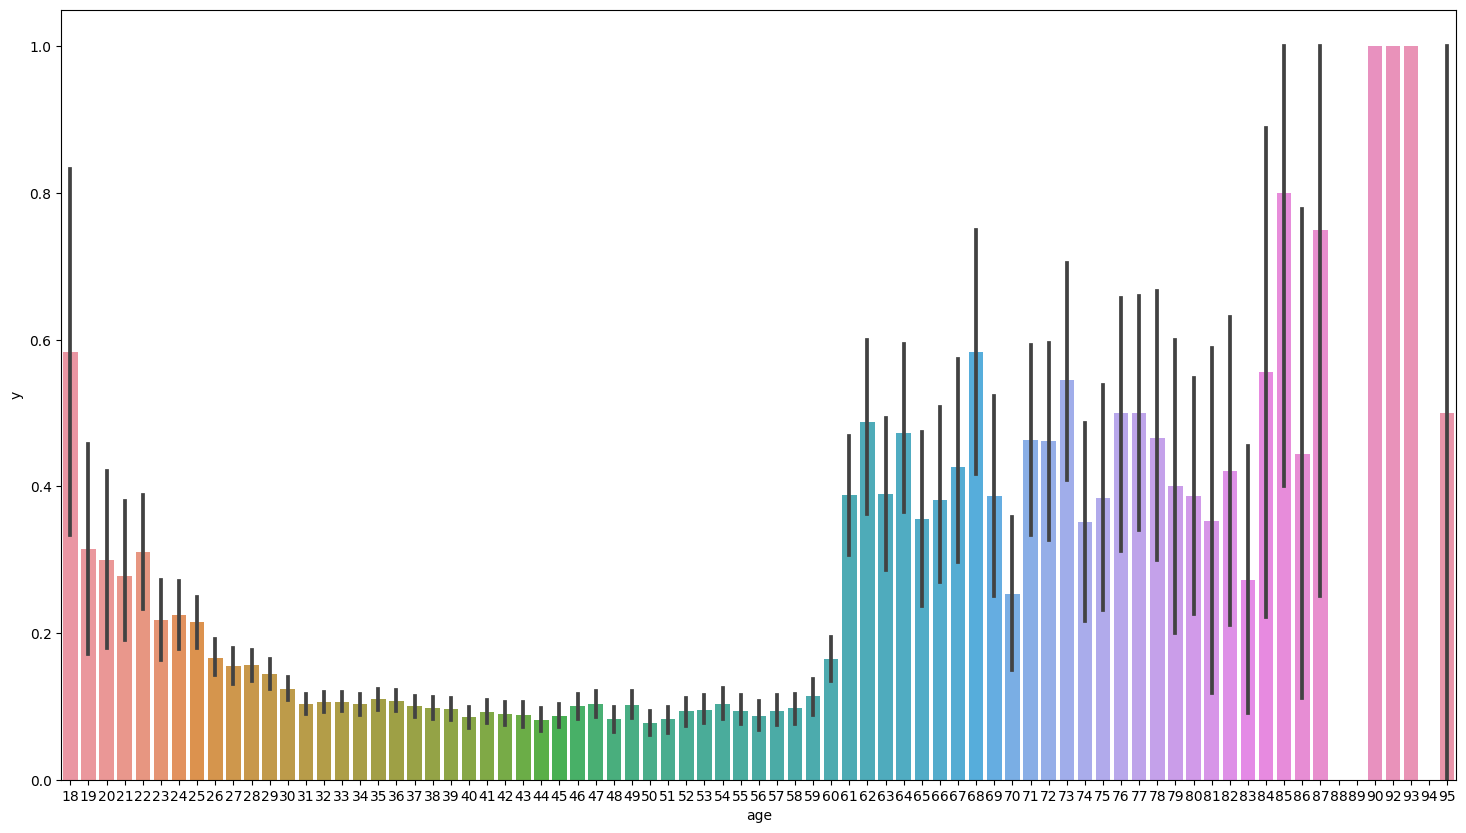

In [22]:
plt.subplots(figsize=(18,10))
sbn.barplot(x="age", y='y', data=dt)
plt.show()

In [23]:
print("Age greater than and equal to 20:")
print(dt[dt['age'] >=20]['y'].value_counts())
print()
print("Age greater than and equal to 30:")
print(dt[dt['age'] >=30]['y'].value_counts())
print()
print("Age greater than and equal to 40:")
print(dt[dt['age'] >=40]['y'].value_counts())
print()
print("Age greater than and equal to 60:")
print(dt[dt['age'] >=60]['y'].value_counts())
print()
print("Age greater than and equal to 70:")
print(dt[dt['age'] >=70]['y'].value_counts())
print()
print("Age greater than and equal to 80:")
print(dt[dt['age'] >=80]['y'].value_counts())
print()
print("Age greater than and equal to 90:")
print(dt[dt['age'] >=90]['y'].value_counts())

Age greater than and equal to 20:
0    39893
1     5271
Name: y, dtype: int64

Age greater than and equal to 30:
0    35577
1     4361
Name: y, dtype: int64

Age greater than and equal to 40:
0    19401
1     2448
Name: y, dtype: int64

Age greater than and equal to 60:
0    1184
1     600
Name: y, dtype: int64

Age greater than and equal to 70:
0    319
1    235
Name: y, dtype: int64

Age greater than and equal to 80:
0    75
1    55
Name: y, dtype: int64

Age greater than and equal to 90:
1    7
0    2
Name: y, dtype: int64


In [24]:
dt=dt[dt['age']>=25]
dt

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age-range
0,58,management,2,tertiary,0,2143,1,0,NaN,5,may,261,1,-1,0,NaN,0,"[40.0, 60.0)"
1,44,technician,1,secondary,0,29,1,0,NaN,5,may,151,1,-1,0,NaN,0,"[40.0, 60.0)"
2,33,entrepreneur,2,secondary,0,2,1,1,NaN,5,may,76,1,-1,0,NaN,0,"[20.0, 40.0)"
3,47,blue-collar,2,unknown,0,1506,1,0,NaN,5,may,92,1,-1,0,NaN,0,"[40.0, 60.0)"
4,33,unknown,1,unknown,0,1,0,0,NaN,5,may,198,1,-1,0,NaN,0,"[20.0, 40.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,2,tertiary,0,825,0,0,1.0,17,nov,977,3,-1,0,NaN,1,"[40.0, 60.0)"
45207,71,retired,0,primary,0,1729,0,0,1.0,17,nov,456,2,-1,0,NaN,1,"[60.0, 80.0)"
45208,72,retired,2,secondary,0,5715,0,0,1.0,17,nov,1127,5,184,3,1.0,1,"[60.0, 80.0)"
45209,57,blue-collar,2,secondary,0,668,0,0,0.0,17,nov,508,4,-1,0,NaN,0,"[40.0, 60.0)"


In [25]:
dt['duration'].value_counts()

124     186
90      181
112     172
136     172
89      172
       ... 
987       1
3422      1
1834      1
1456      1
1556      1
Name: duration, Length: 1568, dtype: int64

In [26]:
dt

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age-range
0,58,management,2,tertiary,0,2143,1,0,NaN,5,may,261,1,-1,0,NaN,0,"[40.0, 60.0)"
1,44,technician,1,secondary,0,29,1,0,NaN,5,may,151,1,-1,0,NaN,0,"[40.0, 60.0)"
2,33,entrepreneur,2,secondary,0,2,1,1,NaN,5,may,76,1,-1,0,NaN,0,"[20.0, 40.0)"
3,47,blue-collar,2,unknown,0,1506,1,0,NaN,5,may,92,1,-1,0,NaN,0,"[40.0, 60.0)"
4,33,unknown,1,unknown,0,1,0,0,NaN,5,may,198,1,-1,0,NaN,0,"[20.0, 40.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,2,tertiary,0,825,0,0,1.0,17,nov,977,3,-1,0,NaN,1,"[40.0, 60.0)"
45207,71,retired,0,primary,0,1729,0,0,1.0,17,nov,456,2,-1,0,NaN,1,"[60.0, 80.0)"
45208,72,retired,2,secondary,0,5715,0,0,1.0,17,nov,1127,5,184,3,1.0,1,"[60.0, 80.0)"
45209,57,blue-collar,2,secondary,0,668,0,0,0.0,17,nov,508,4,-1,0,NaN,0,"[40.0, 60.0)"


In [27]:
print("Duration less than equal to 10:")
print(dt[dt['duration'] <=10]['y'].value_counts())
print()
print("Duration less than equal to 20:")
print(dt[dt['duration'] <=20]['y'].value_counts())
print()
print("Duration less than equal to 30:")
print(dt[dt['duration'] <=30]['y'].value_counts())
print()
print("Duration less than equal to 40:")
print(dt[dt['duration'] <=40]['y'].value_counts())
print()
print("Duration less than equal to 50:")
print(dt[dt['duration'] <=50]['y'].value_counts())
print()
print("Duration less than equal to 60:")
print(dt[dt['duration'] <=60]['y'].value_counts())

Duration less than equal to 10:
0    402
Name: y, dtype: int64

Duration less than equal to 20:
0    1238
1       1
Name: y, dtype: int64

Duration less than equal to 30:
0    1966
1       4
Name: y, dtype: int64

Duration less than equal to 40:
0    2642
1       6
Name: y, dtype: int64

Duration less than equal to 50:
0    3548
1       8
Name: y, dtype: int64

Duration less than equal to 60:
0    4688
1       8
Name: y, dtype: int64


In [28]:
dt=dt[dt['duration']>60]
dt

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age-range
0,58,management,2,tertiary,0,2143,1,0,NaN,5,may,261,1,-1,0,NaN,0,"[40.0, 60.0)"
1,44,technician,1,secondary,0,29,1,0,NaN,5,may,151,1,-1,0,NaN,0,"[40.0, 60.0)"
2,33,entrepreneur,2,secondary,0,2,1,1,NaN,5,may,76,1,-1,0,NaN,0,"[20.0, 40.0)"
3,47,blue-collar,2,unknown,0,1506,1,0,NaN,5,may,92,1,-1,0,NaN,0,"[40.0, 60.0)"
4,33,unknown,1,unknown,0,1,0,0,NaN,5,may,198,1,-1,0,NaN,0,"[20.0, 40.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,2,tertiary,0,825,0,0,1.0,17,nov,977,3,-1,0,NaN,1,"[40.0, 60.0)"
45207,71,retired,0,primary,0,1729,0,0,1.0,17,nov,456,2,-1,0,NaN,1,"[60.0, 80.0)"
45208,72,retired,2,secondary,0,5715,0,0,1.0,17,nov,1127,5,184,3,1.0,1,"[60.0, 80.0)"
45209,57,blue-collar,2,secondary,0,668,0,0,0.0,17,nov,508,4,-1,0,NaN,0,"[40.0, 60.0)"


In [29]:
print(dt[dt['pdays'] == -1]['y'].value_counts())

0    29093
1     3247
Name: y, dtype: int64


In [30]:
dt['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [31]:
month_mapping={'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12}

In [32]:
data=[dt]
for dataset in data:
    dataset['month'] = dataset['month'].map(month_mapping)

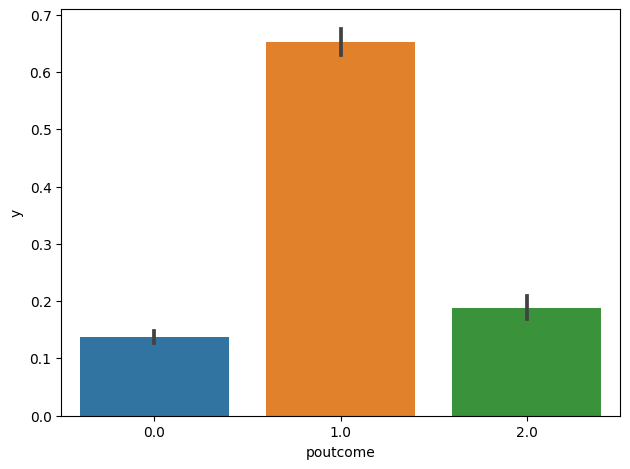

In [33]:
sbn.barplot(x="poutcome", y='y', data=dt)
plt.tight_layout()
plt.show()

In [34]:
print("Percentage of term deposit taken where outcome is other out of all other outcomes:", dt["y"][dt["poutcome"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of term deposit taken where outcome is success out of all other outcomes:", dt["y"][dt["poutcome"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of term deposit taken where outcome is failure out of all other outcomes:", dt["y"][dt["poutcome"] == 0].value_counts(normalize = True)[1]*100)

Percentage of term deposit taken where outcome is other out of all other outcomes: 18.899676375404532
Percentage of term deposit taken where outcome is success out of all other outcomes: 65.33052039381153
Percentage of term deposit taken where outcome is failure out of all other outcomes: 13.746017296313154


In [35]:
dt1 = dt.drop(dt[dt['poutcome'] == 2].index, axis = 0, inplace = False)

In [36]:
dt1.describe()

,age,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,38161.000000,38161.000000,38161.000000,38161.000000,38161.000000,38161.000000,26973.000000,38161.000000,38161.000000,38161.000000,38161.000000,38161.000000,38161.000000,5816.000000,38161.000000
mean,41.351589,1.494720,0.018396,1368.955819,0.551008,0.162496,0.920698,15.714237,6.182831,284.196221,2.540368,32.733602,0.440266,0.244498,0.125311
std,10.510728,0.696901,0.134379,3051.245862,0.497398,0.368910,0.270214,8.301102,2.384597,260.884330,2.497662,90.684475,1.522560,0.429826,0.331076
min,25.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,1.000000,61.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,72.000000,0.000000,0.000000,1.000000,8.000000,5.000000,125.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,2.000000,0.000000,449.000000,1.000000,0.000000,1.000000,16.000000,6.000000,201.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,49.000000,2.000000,0.000000,1440.000000,1.000000,0.000000,1.000000,21.000000,8.000000,342.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,95.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,1.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,55.000000,1.000000,1.000000


In [37]:
print("Jobs :",dt1['education'].unique())

Jobs : ['tertiary' 'secondary' 'unknown' 'primary']


In [38]:
dt1["education"].replace('unknown',np.nan,inplace=True)
dt2=dt1.dropna(subset=["education"])

In [39]:
education_mapping = {"primary":1,"secondary":2,"tertiary":3}
data1=[dt2]
for dataset in data1:
    dataset['education'] = dataset['education'].map(education_mapping)

In [40]:
dt2.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age-range
11070,37,admin.,2,2,0,10465,0,0,NaN,17,6,144,6,-1,0,NaN,0,"[20.0, 40.0)"
24385,58,management,0,3,0,1573,1,1,1.0,17,11,279,1,-1,0,NaN,0,"[40.0, 60.0)"
19552,35,management,2,2,0,616,0,1,1.0,7,8,92,2,-1,0,NaN,0,"[20.0, 40.0)"
21089,44,housemaid,2,1,0,882,0,0,0.0,14,8,187,4,-1,0,NaN,0,"[40.0, 60.0)"
18845,45,management,0,2,0,1950,0,0,1.0,4,8,498,1,-1,0,NaN,0,"[40.0, 60.0)"
28711,33,unemployed,1,2,0,1173,0,0,1.0,30,1,844,3,-1,0,NaN,0,"[20.0, 40.0)"
8663,58,management,0,3,0,50,1,0,NaN,3,6,109,4,-1,0,NaN,0,"[40.0, 60.0)"
32716,46,blue-collar,2,2,0,229,1,0,1.0,17,4,191,1,-1,0,NaN,0,"[40.0, 60.0)"
12561,35,technician,0,2,0,2,0,0,NaN,3,7,88,1,-1,0,NaN,0,"[20.0, 40.0)"
6112,59,retired,1,2,0,351,1,0,NaN,27,5,1063,5,-1,0,NaN,1,"[40.0, 60.0)"


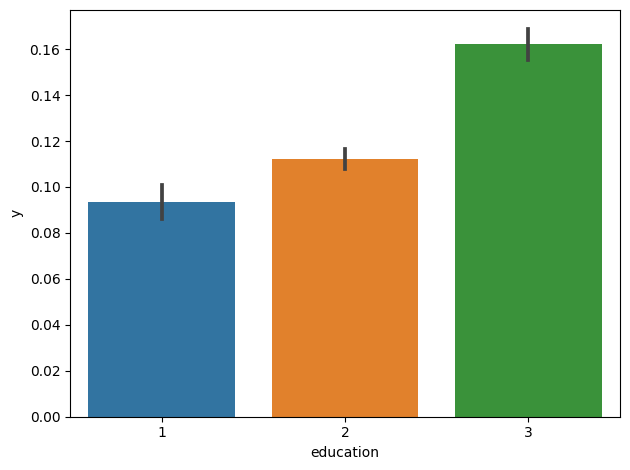

In [41]:
sbn.barplot(x="education", y='y', data=dt2)
plt.tight_layout()
plt.show()

In [42]:
dt2['job'].unique()

array(['management', 'technician', 'entrepreneur', 'admin.', 'services',
       'retired', 'blue-collar', 'self-employed', 'unemployed',
       'housemaid', 'student', 'unknown'], dtype=object)

In [43]:
dt2["job"].replace('unknown',np.nan,inplace=True)

In [44]:
dt3=dt2.dropna(subset=["job"])

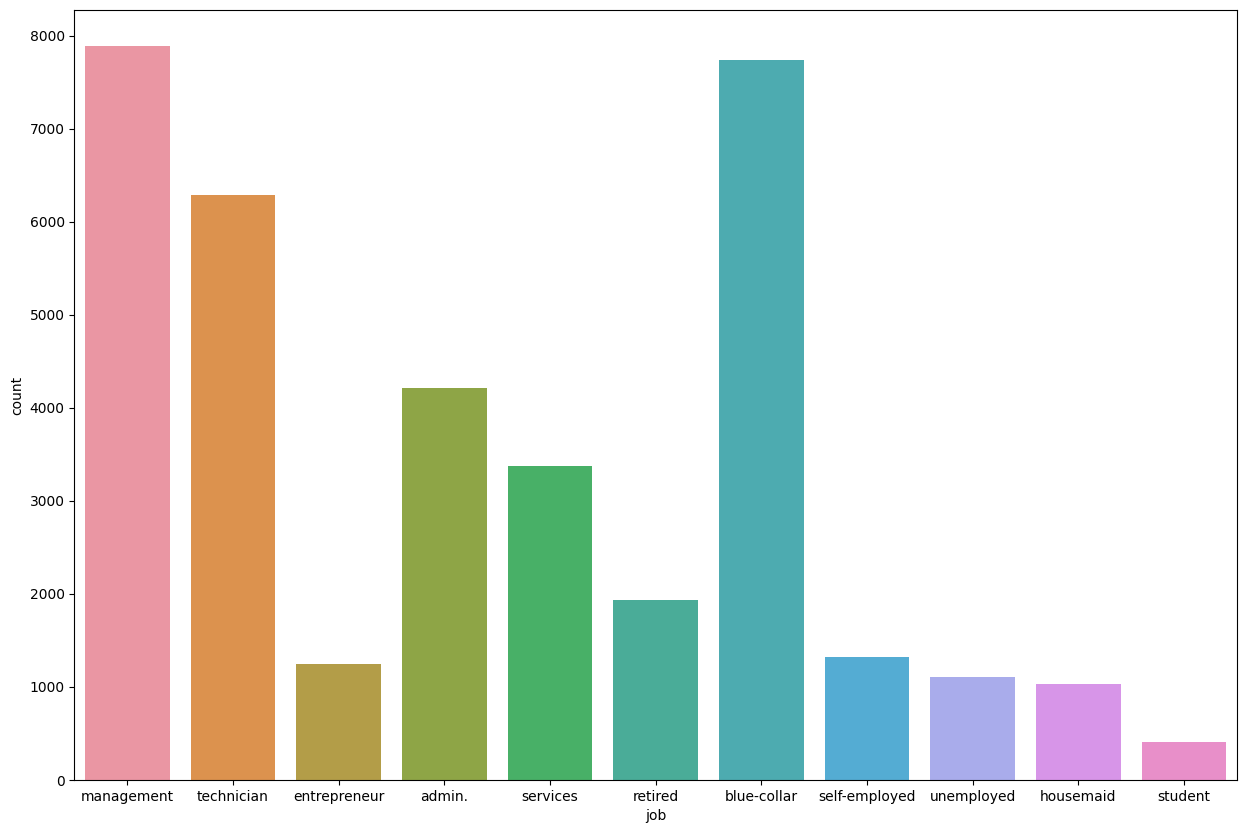

In [45]:
plt.subplots(figsize=(15,10))
sbn.countplot(x='job', data=dt2)
plt.show()

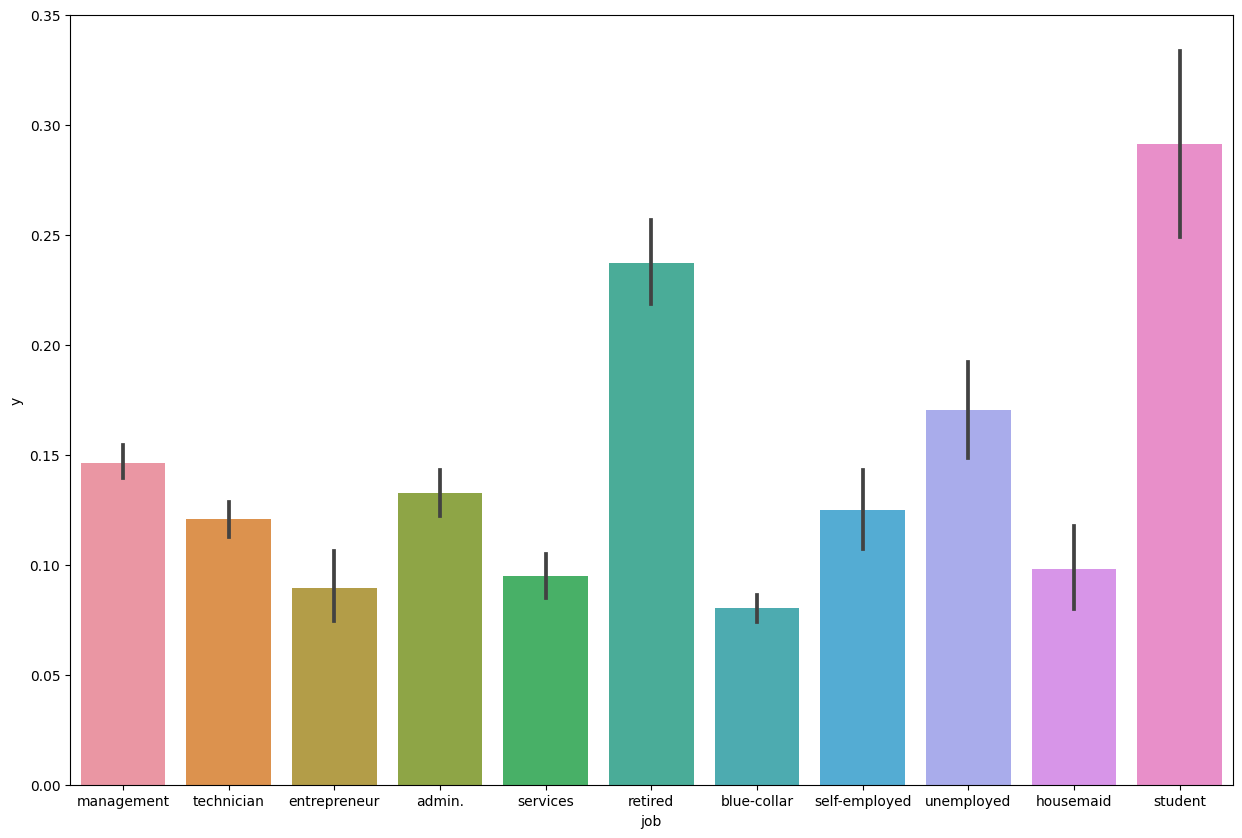

In [46]:
plt.subplots(figsize=(15,10))
sbn.barplot(x="job", y='y', data=dt2)
plt.show()

In [47]:
dt3["poutcome"]  = dt3["poutcome"].fillna(-0.5)

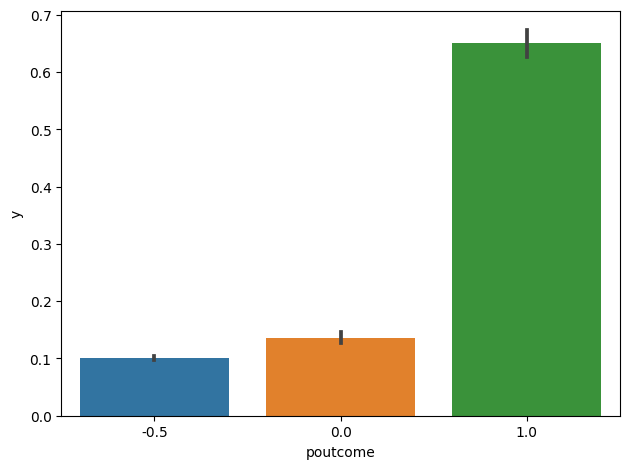

In [48]:
sbn.barplot(x="poutcome", y='y', data=dt3)
plt.tight_layout()
plt.show()

In [49]:
#the poutcome dependency on NaN values is almost similar to the failure outcome
#dropping all unknown values
#dt3=dt3[dt3['poutcome']!=-0.5]

Replacing all unknown values by 0, as both have same trend

In [50]:
dt3["poutcome"].replace(-0.5,0,inplace=True)

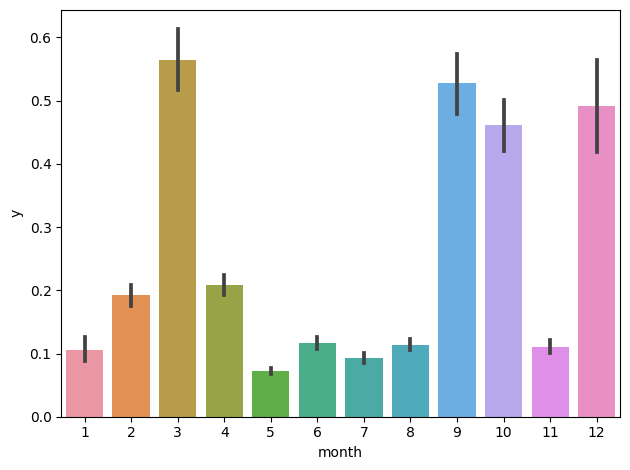

In [51]:
sbn.barplot(x="month", y="y", data=dt3)
plt.tight_layout()
plt.show()

3,9,10,12 have more percentage of term deposit subscribed

In [52]:
def cl_month(i):
    if i['month'] == 3 or i['month'] == 9 or i['month'] == 10 or i['month'] == 12:
        return 1
    else:
        return 0
dt3['month']=dt3.apply(cl_month,axis=1)

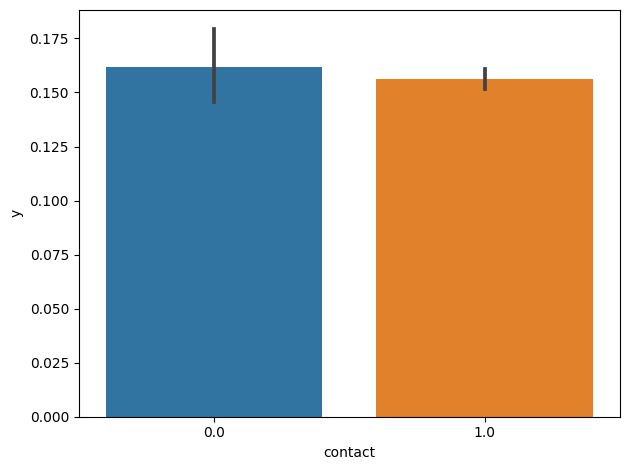

In [53]:
sbn.barplot(x="contact", y="y", data=dt3)
plt.tight_layout()
plt.show()

It does not give any specific information.

In [54]:
dt4=dt3.drop(['contact'],axis=1)

In [55]:
dt4.sample(11)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y,age-range
4426,35,technician,1,2,0,1861,1,0,20,0,297,1,-1,0,0.0,0,"[20.0, 40.0)"
26396,57,management,2,3,0,412,0,0,20,0,123,1,-1,0,0.0,0,"[40.0, 60.0)"
17882,42,admin.,2,2,0,947,0,0,30,0,158,2,-1,0,0.0,0,"[40.0, 60.0)"
34176,30,admin.,1,3,0,305,0,0,30,0,633,1,85,2,1.0,1,"[20.0, 40.0)"
14986,29,management,2,3,0,16,1,0,16,0,605,6,-1,0,0.0,0,"[20.0, 40.0)"
38283,28,admin.,1,2,0,7,1,0,15,0,87,1,-1,0,0.0,0,"[20.0, 40.0)"
255,39,blue-collar,2,1,0,279,1,0,5,0,361,1,-1,0,0.0,0,"[20.0, 40.0)"
7876,31,housemaid,2,2,0,1,1,0,30,0,101,16,-1,0,0.0,0,"[20.0, 40.0)"
30722,54,management,2,3,0,5927,0,0,6,0,256,2,-1,0,0.0,0,"[40.0, 60.0)"
9095,42,unemployed,2,2,0,202,0,0,5,0,257,1,-1,0,0.0,0,"[40.0, 60.0)"


In [56]:
dt4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36525 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        36525 non-null  int64   
 1   job        36525 non-null  object  
 2   marital    36525 non-null  int64   
 3   education  36525 non-null  int64   
 4   default    36525 non-null  int64   
 5   balance    36525 non-null  int64   
 6   housing    36525 non-null  int64   
 7   loan       36525 non-null  int64   
 8   day        36525 non-null  int64   
 9   month      36525 non-null  int64   
 10  duration   36525 non-null  int64   
 11  campaign   36525 non-null  int64   
 12  pdays      36525 non-null  int64   
 13  previous   36525 non-null  int64   
 14  poutcome   36525 non-null  float64 
 15  y          36525 non-null  int64   
 16  age-range  36525 non-null  category
dtypes: category(1), float64(1), int64(14), object(1)
memory usage: 4.8+ MB


In [57]:
dt4 = pd.get_dummies(dt4,columns=['job'],drop_first=True)

In [58]:
dt4.drop(['age-range'], axis=1, inplace = True)

#FEATURE SELECTION

In [59]:
input_predictors = dt4.drop(['y'], axis=1)
output_target = dt4["y"]

#TRAIN-TEST SPLIT

In [60]:
x_train, x_val, y_train, y_val = train_test_split(input_predictors, output_target,test_size=0.25, random_state=7)
x_train

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
23618,37,2,2,0,729,0,0,28,0,156,...,0,0,0,0,0,0,0,0,1,0
3574,44,0,2,0,809,1,0,15,0,118,...,0,0,0,0,0,0,0,0,1,0
16125,31,1,3,0,4331,1,0,22,0,318,...,0,0,0,1,0,0,0,0,0,0
4087,46,0,2,0,778,1,0,19,0,579,...,0,0,0,0,0,0,1,0,0,0
31878,51,0,1,0,155,1,1,9,0,220,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,43,2,2,0,1311,1,0,14,0,746,...,1,0,0,0,0,0,0,0,0,0
41940,35,1,3,0,1750,1,0,22,1,422,...,0,0,0,1,0,0,0,0,0,0
16499,51,2,2,0,95,1,0,23,0,1309,...,0,0,0,0,0,1,0,0,0,0
1076,39,2,2,0,365,1,0,7,0,274,...,0,0,1,0,0,0,0,0,0,0


#MODEL BUILDING

In [61]:
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_val)

In [62]:
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "Accuracy of LogisticRegression : ", acc_logreg)

Accuracy of LogisticRegression :  88.39


In [63]:
print("Confusion Matrix:")
print( confusion_matrix(y_val, y_pred))

Confusion Matrix:
[[7834  168]
 [ 892  238]]


#STANDARD-SCALING

In [64]:
scaler = StandardScaler().fit(x_train)
X_train_scaled = scaler.transform(x_train)

In [65]:
model = SVC()
model.fit(X_train_scaled, y_train)   #Training of algorithm

x_val_scaled=scaler.transform(x_val)
predictions = model.predict(x_val_scaled)
print("All predictions done successfully by SVM Machine Learning Algorithms.")
print("\nAccuracy score: %f" % accuracy_score(y_val, predictions))

All predictions done successfully by SVM Machine Learning Algorithms.

Accuracy score: 0.892795


##SVC Accuracy: 89.27%

## CONFUSION MATRIX FOR SVC

In [66]:
print("Scaled Confusion Matrix in SVC:\n")
confusion_matrix(y_val, predictions)

Scaled Confusion Matrix in SVC:



array([[7828,  174],
       [ 805,  325]])

Using the components of the confusion matrix, we can define the various metrics used for evaluating classifiers—accuracy, precision, recall, and F1 score.

##LogReg Model Precision and Recall

In [67]:
precision=7834/(168+7834)
recall=7834/(7834+892)

print("LogReg Precision: ",precision)
print("LogReg Recall: ",recall)

LogReg Precision:  0.979005248687828
LogReg Recall:  0.8977767591107036


##LogRes Model F1-Score

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.


In [68]:
F1 = 2 * (precision * recall) / (precision + recall)
print("LogReg F1-score", F1)

LogReg F1-score 0.9366331898613104
